# Aims:
* I will write all codes for numerical analysis in this notebook.
* I want to use Object oriented programming for this staffs.
* I follow *Introduction to Numerical Analysis* by *S S Sastry*.
* I shall take few inbuit function to manupulate my code (in other word make my life easy).

### I am very much motivated from a sentance:
    
   > Code are more often **read** than write.

# Chapter 1: Errors in Numerical Calculations 

   **Problem 1: Error in a series approximations** <br/>
   
   We know the series of $\sin x$ about $x = 0 $ is given by
   
   $$ \sum_{i = 0}^{\infty}=(-1)^n \frac{x^{2i+1}}{(2i+1)!}$$
   
   For say you know somehow $\sin x$ for a certain $x$. To verify the above equation is right or wrong you have to tolarate some error and see for what order of $x$ the error of actual value of $\sin x$ is differ from the series evaluted value.
   
   So we going to create a function for `fact` for factorial and `while` loop for finding the actual order for which the error is our given value.
   
   This problem was first given to me in first sem final exam by *ADC Sir(RKMVCC)*. I had tried that out. 

In [1]:
from math import sin #I have only right to import sin() from math library.

# I want to make this code in a class "Series_approx" :: In progress...

def fact(n):
    if n < 1:
        return 1
    return n*fact(n-1)
    
# Creating the sin x series 
def sine(x,n):                         #Where x is the value and n is the order 
    sum = 0
    for i in range(n):
        sum += (-1)**i * x**(2*i+1)/fact(2*i+1)  
    return sum

# To get the order 
def get_the_order(x, error):
    order = 0
    while (abs(sin(x) - sine(x, order)) > error):
        order += 1
    return order

# This function is created for the user to find easily the value of radian of input degree 
def degtoRad(x):
    return 3.1415*x/180

# Chapter 2: Finding the root(Real) of a equation using numerical analysis 
#### Targets are::

* Bisection method
* Newton-Raphson Method from this find the sqrt of a number as well of cbrt of a number
* Method of false position
* Ramanujan's Method

# 1. Bisection Method

**Theorem** :  If a function $f(x)$ is continuos between a and b, and $f(a)$ and $f(b)$ are of opposite signs, then there exists at least one root between a and b.

This theorem can be easily visualised in the following figure.

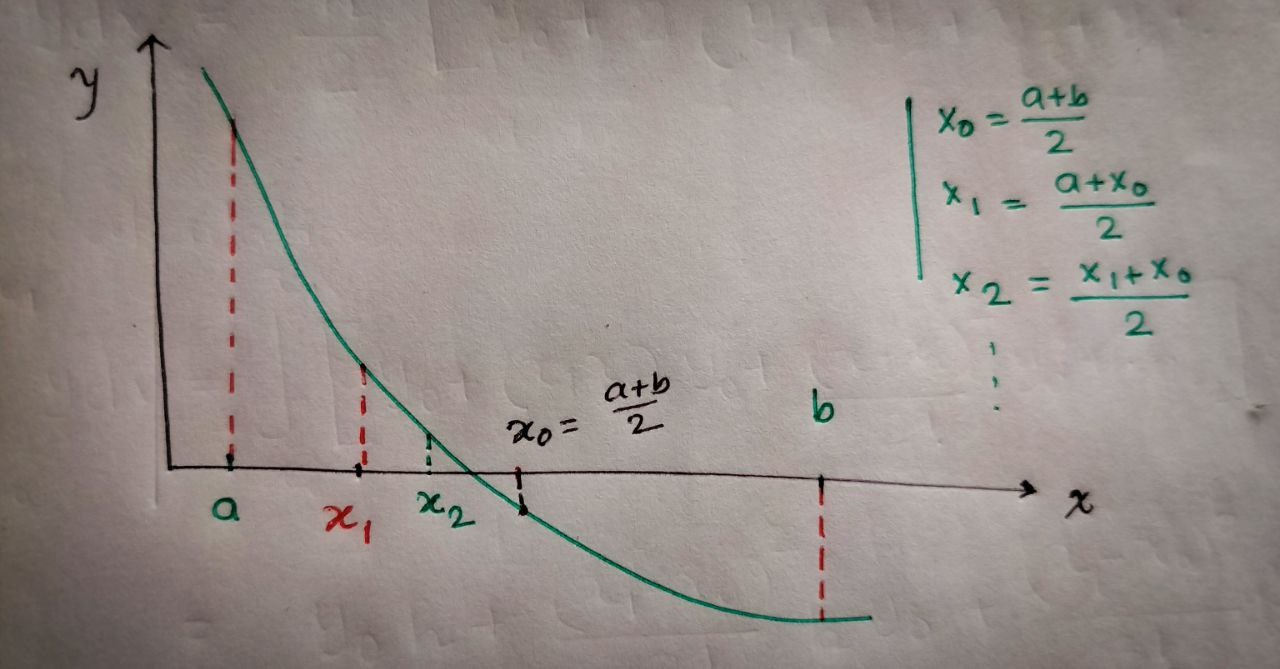

In [2]:
from IPython.display import Image, display
display(Image(filename = '/home/souvik/Downloads/Telegram Desktop/Bisection.jpg',width=500,
    height=1000))

If a equaion gives a(or many) real root then the curve cuts x-axis once(many). Now if we stood at that point(root) and look around in our both sides then we must notice that the curve must change it's sign. It is not necessary condition. Because you can think about what will happend $x^2=0$. It is good time to wait and ponder what is going on. And then you are in a straight  way to explore bisection method.

#### Algorithm:

1. Choose two real number $a$ and $b$ *such that $f(a)f(b)<0$*.

2. Set $x_r = \frac {a+b}{2}$

3.   (a) If $f(a)f(x_r) < 0$, the root lies in the interval $(a, x_r)$. Then, set $b = x_r$ and go to step 2 above.

     (b) If $f(a)f(b) > 0$, the root lies in the interval $(a, x_r)$. Then, set $a = x_r$ and go to step 2 above.
     
     (c) If $f(a)f(x_r) = 0$, $x_r$ is the root of the equation, terminate the comptation.
     
     

But in practice the root may not be exact so that the condition 8 migh tbr fullfilled. So the **Strategy** I am going to use is that I will check the all new $x_r$ with the old $x_r$. 

A convenient criterion is to compute the percentage error $\epsilon_r$ defined by

$$ \epsilon_r = \left|\frac{x'_r-x_r}{x'_r}\right| \times 100%$$ 
where $x'_r$ is the new value of $x_r$.

We can use this $\epsilon_r$ to a get the number of iterations. $\epsilon_r$ works here as a **accuracy measurement** instrument.

In [3]:
def Bisection(a, b, f):
    if f(a)*f(b) > 0:
        print("Retry with new a and b")
    elif f(a)*f(b) < 0:
        n = 0
        while (n < 10):
            x = (a+b)/2
            if f(a)*f(x) < 0:
                b = x
            elif f(b)*f(x) < 0:
                a = x
            else:
                return x
            n += 1
        return x       
    else:
        if f(a) == 0:
             return a
        else:
            return b

In [4]:
def f(x):
    return x*2 
print(f"{Bisection(-1, 10, f):.5f}")

-0.00098


# 2. Newton-Raphson Method

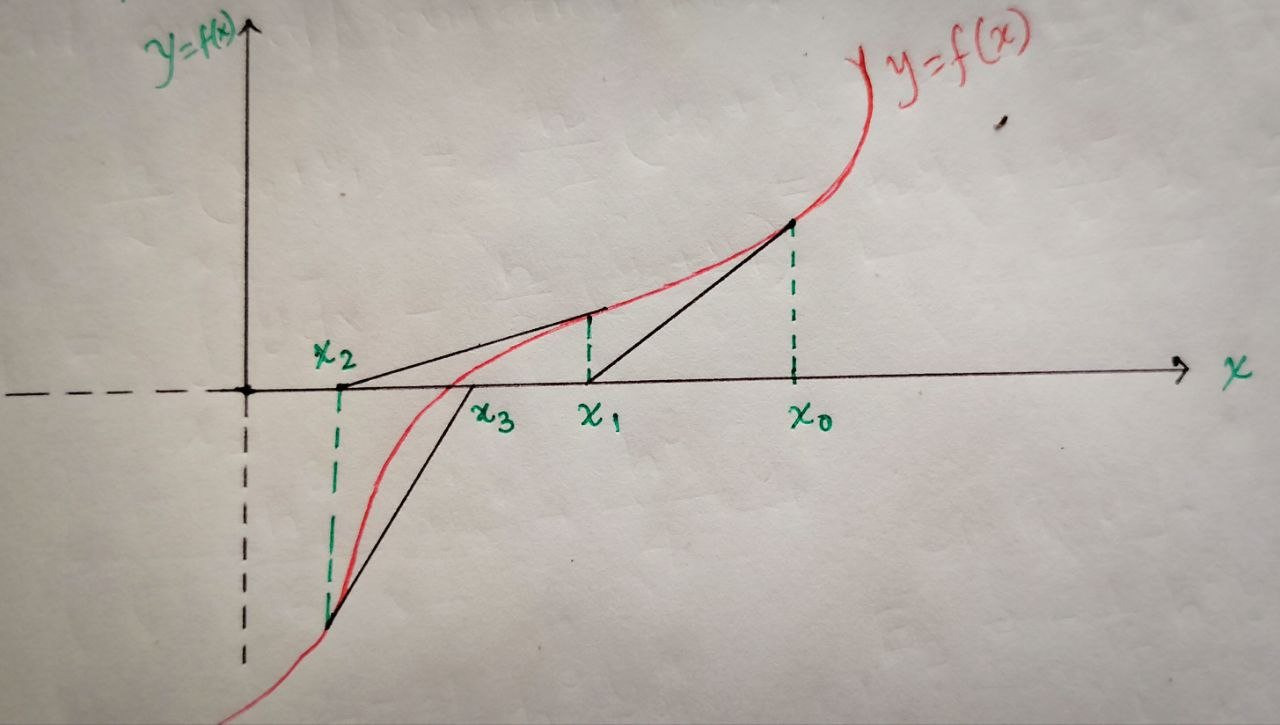

In [5]:
from IPython.display import Image, display
display(Image(filename = '/home/souvik/Downloads/Telegram Desktop/Newton.jpg',width=500,
    height=1000))

Red curve is some arbitrary functional graph of $y = f(x)$. We are interested in finding a root of the equation. Where the curve cuts the x-axis is the root of the equation. So we have to reached that point by some means. Where Newton-Raphson method helps us. Why Newton as well Raphson? I don't know. Let me know if you find that.

In this method we have to give some root, $x$(sometime it might not be some arbitrary). Anyway let it be $x_0$. Now we have to find the slope at that point and extend the slope so that it cuts the x-axis. By my figure it is $x_1$. Again you have have to find and extend the slope at that point. Repeating that process you will reached the root. Pause and ponder.

Come with me to explore the formula involve Newton-Raphson(NR) method.
We have to guess a root. Let say $x0$ is our guess. Now how can we go to next root(say $x_1$)? We can use the slope at the point $x_0$.
$$ f'(x_0) = \frac {f(x_0-0}{x_0-x_1}$$
Therefore, $$x_1 = x_0 - \frac {f(x_0)}{f'(x_0)}$$
Yeah, we got $x_1$. Next goal is to find $x_2$. Again we will use slope method.
$$ f'(x_1) = \frac {f(x_1-0}{x_1-x_2}$$
Therefore, $$x_2 = x_1 - \frac {f(x_1)}{f'(x_1)}$$
And the process will go until you get the approximate value you are interested.



Actually the above process I don't know how I find that. In books they uses Taylor's series to derive that one. It is the following:
Let $x_0$ be an approximate root of $f(x)=0$ and let $x_1=x_0+h$ be the correct root so that $f(x_1)=0$. Expanding $f(x_0+h)$ by Taylor's series, we obtain
$$f(x_0+h)=f(x_0)+hf'(x_0)+\frac{h^2}{2!}f''(x_0)+....=0$$
Neglecting the second and higher order terms we have 
$$f(x_0)+hf'(x_0)=0$$
$$\implies h = -\frac{f(x_0)}{f'(x_0)}$$
A better approximations than $x_0$ is, therefore gives by $x_1$, where
$$x_1 = x_0-\frac{f(x_0)}{f'(x_0)}$$
So the iterative method gives us:
$$x_{n+1}=x_n-\frac {f(x_n)}{f'(x_n)}$$

In [7]:
# Newton-Raphson Method 

def NR(f, df, x0, n):
    for i in range(n):
        x = x0 - f(x0)/df(x0)
        if f(x) != 0:
            x0 = x
    return x

def f(x):
    return x**3 - 5
 
def df(x):
    return 3*x*x 
 
print(NR(f, df, 5, 5))

1.710148601756556


# Comparison between Bisection Method and NR method.